In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

%matplotlib inline

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

#plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data = pd.read_excel('../data/tokyo-clean.xlsx')

In [3]:
# extremes seem to be errors - to be clipped

# highest trade prices
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).head(10).index].TradePriceYen)

print()

# lowest trade prices
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).tail(10).index].TradePriceYen)

259224    170000000000
25481      61000000000
47260      32000000000
233294     31000000000
205307     30000000000
210567     27000000000
354407     26000000000
395492     25000000000
71250      24000000000
467204     23000000000
Name: TradePriceYen, dtype: int64

275639    100000
484704    100000
435225     50000
203384     50000
49120      10000
97435       4000
144795      2700
27367       1200
368590      1000
97285        500
Name: TradePriceYen, dtype: int64


In [4]:
# Quantile cutoffs
lower_q = 0.005
upper_q = 0.995

low, high = data['TradePriceYen'].quantile([lower_q, upper_q])

data = data[(data['TradePriceYen'] >= low) & (data['TradePriceYen'] <= high)].copy()
data.reset_index(drop=True, inplace=True)

In [5]:
# highest trade prices (after clipping)
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).head(10).index].TradePriceYen)

print()

# lowest trade prices (after clipping)
print(data.iloc[data.TradePriceYen.sort_values(ascending=False).tail(10).index].TradePriceYen)

155852    800000000
398751    800000000
404332    800000000
228638    800000000
189911    800000000
254480    800000000
82180     800000000
151428    800000000
185093    800000000
259860    800000000
Name: TradePriceYen, dtype: int64

388252    3400000
377917    3400000
115384    3400000
63247     3400000
146731    3400000
159468    3400000
370595    3400000
71328     3400000
377792    3400000
324940    3400000
Name: TradePriceYen, dtype: int64


In [6]:
data.head()

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,PricePerUnit,FloorPlan,Area,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
0,Real Estate Transaction Price Information,Residential Land(Land and Building),Commercial Area,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,14000000,NaN,NaN,120,...,80.0,500.0,NaN,Dealings including private road,0,0,0,2010,2,2010-06-30
1,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,7300000,NaN,1K,20,...,80.0,600.0,Not yet,NaN,0,0,0,2010,2,2010-06-30
2,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,8200000,NaN,1K,20,...,80.0,700.0,Not yet,NaN,0,0,0,2010,2,2010-06-30
3,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Higashikanda,10000000,NaN,NaN,20,...,80.0,500.0,NaN,NaN,0,0,0,2010,2,2010-06-30
4,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",NaN,東京都 (Tokyo),千代田区 (Chiyoda Ward),Iwamotocho,11000000,NaN,1R,20,...,80.0,700.0,Not yet,NaN,0,0,0,2010,2,2010-06-30


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517205 entries, 0 to 517204
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   PriceCategory              517205 non-null  object        
 1   Type                       517205 non-null  object        
 2   Region                     166608 non-null  object        
 3   Prefecture                 517205 non-null  object        
 4   Municipality               517205 non-null  object        
 5   DistrictName               517167 non-null  object        
 6   TradePriceYen              517205 non-null  int64         
 7   PricePerUnit               0 non-null       float64       
 8   FloorPlan                  340257 non-null  object        
 9   Area                       517205 non-null  int64         
 10  UnitPrice                  0 non-null       float64       
 11  LandShape                  166553 non-null  object  

In [8]:
data.describe(include='all')

,PriceCategory,Type,Region,Prefecture,Municipality,DistrictName,TradePriceYen,PricePerUnit,FloorPlan,Area,...,CoverageRatio,FloorAreaRatio,Renovation,Remarks,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter,TransactionQuarterEndDate
count,517205,517205,166608,517205,517205,517167,5.172050e+05,0.0,340257,517205.000000,...,422427.000000,422421.000000,211404,23894,517205.000000,517205.00000,517205.000000,517205.000000,517205.000000,517205
unique,2,2,4,1,59,1439,NaN,NaN,66,NaN,...,NaN,NaN,2,21,NaN,NaN,NaN,NaN,NaN,NaN
top,Real Estate Transaction Price Information,"Pre-owned Condominiums, etc.",Residential Area,東京都 (Tokyo),世田谷区 (Setagaya Ward),Honcho,NaN,NaN,3LDK,NaN,...,NaN,NaN,Not yet,Dealings including private road,NaN,NaN,NaN,NaN,NaN,NaN
freq,402397,326411,150797,517205,31043,3503,NaN,NaN,95437,NaN,...,NaN,NaN,151606,17664,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.281673e+07,NaN,NaN,84.298972,...,63.047888,276.400629,NaN,NaN,0.000487,0.00036,0.000638,2018.615282,2.447853,2019-03-23 08:02:54.123606784
min,NaN,NaN,NaN,NaN,NaN,NaN,3.400000e+06,NaN,NaN,10.000000,...,20.000000,15.000000,NaN,NaN,0.000000,0.00000,0.000000,2010.000000,1.000000,2010-03-31 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+07,NaN,NaN,45.000000,...,60.000000,150.000000,NaN,NaN,0.000000,0.00000,0.000000,2015.000000,1.000000,2015-06-30 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.800000e+07,NaN,NaN,65.000000,...,60.000000,200.000000,NaN,NaN,0.000000,0.00000,0.000000,2020.000000,2.000000,2020-03-31 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.900000e+07,NaN,NaN,95.000000,...,80.000000,400.000000,NaN,NaN,0.000000,0.00000,0.000000,2022.000000,3.000000,2022-12-31 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,8.000000e+08,NaN,NaN,9999.000000,...,501.000000,4080.000000,NaN,NaN,1.000000,1.00000,1.000000,2025.000000,4.000000,2025-06-30 00:00:00


In [9]:
data.isnull().sum()

PriceCategory                     0
Type                              0
Region                       350597
Prefecture                        0
Municipality                      0
DistrictName                     38
TradePriceYen                     0
PricePerUnit                 517205
FloorPlan                    176948
Area                              0
UnitPrice                    517205
LandShape                    350652
Frontage                     365480
TotalFloorArea               333827
BuildingYear                  18047
Structure                     14824
Use                          154256
Purpose                      231407
RoadDirection                330240
Classification               330828
Breadth                      332385
CityPlanning                  13064
CoverageRatio                 94778
FloorAreaRatio                94784
Renovation                   305801
Remarks                      493311
BuildingYearFloored               0
FrontageCapped              

In [10]:
# numerical columns

for col in data.select_dtypes(include='number').columns:
    print(col)

TradePriceYen
PricePerUnit
Area
UnitPrice
Frontage
TotalFloorArea
BuildingYear
Breadth
CoverageRatio
FloorAreaRatio
BuildingYearFloored
FrontageCapped
TotalFloorAreaCapped
TransactionYear
TransactionQuarter


In [11]:
# categorical columns

for col in data.select_dtypes(include='object').columns:
    print(col)

PriceCategory
Type
Region
Prefecture
Municipality
DistrictName
FloorPlan
LandShape
Structure
Use
Purpose
RoadDirection
Classification
CityPlanning
Renovation
Remarks


In [12]:
data.nunique().sort_values()

UnitPrice                       0
PricePerUnit                    0
Prefecture                      1
PriceCategory                   2
Renovation                      2
FrontageCapped                  2
BuildingYearFloored             2
Type                            2
TotalFloorAreaCapped            2
Region                          4
TransactionQuarter              4
Purpose                         6
RoadDirection                   9
LandShape                       9
Classification                 15
TransactionYear                16
CityPlanning                   16
Remarks                        21
Structure                      24
CoverageRatio                  40
Municipality                   59
TransactionQuarterEndDate      62
FloorPlan                      66
BuildingYear                   83
FloorAreaRatio                120
TotalFloorArea                156
Area                          171
Use                           213
TradePriceYen                 227
Breadth       

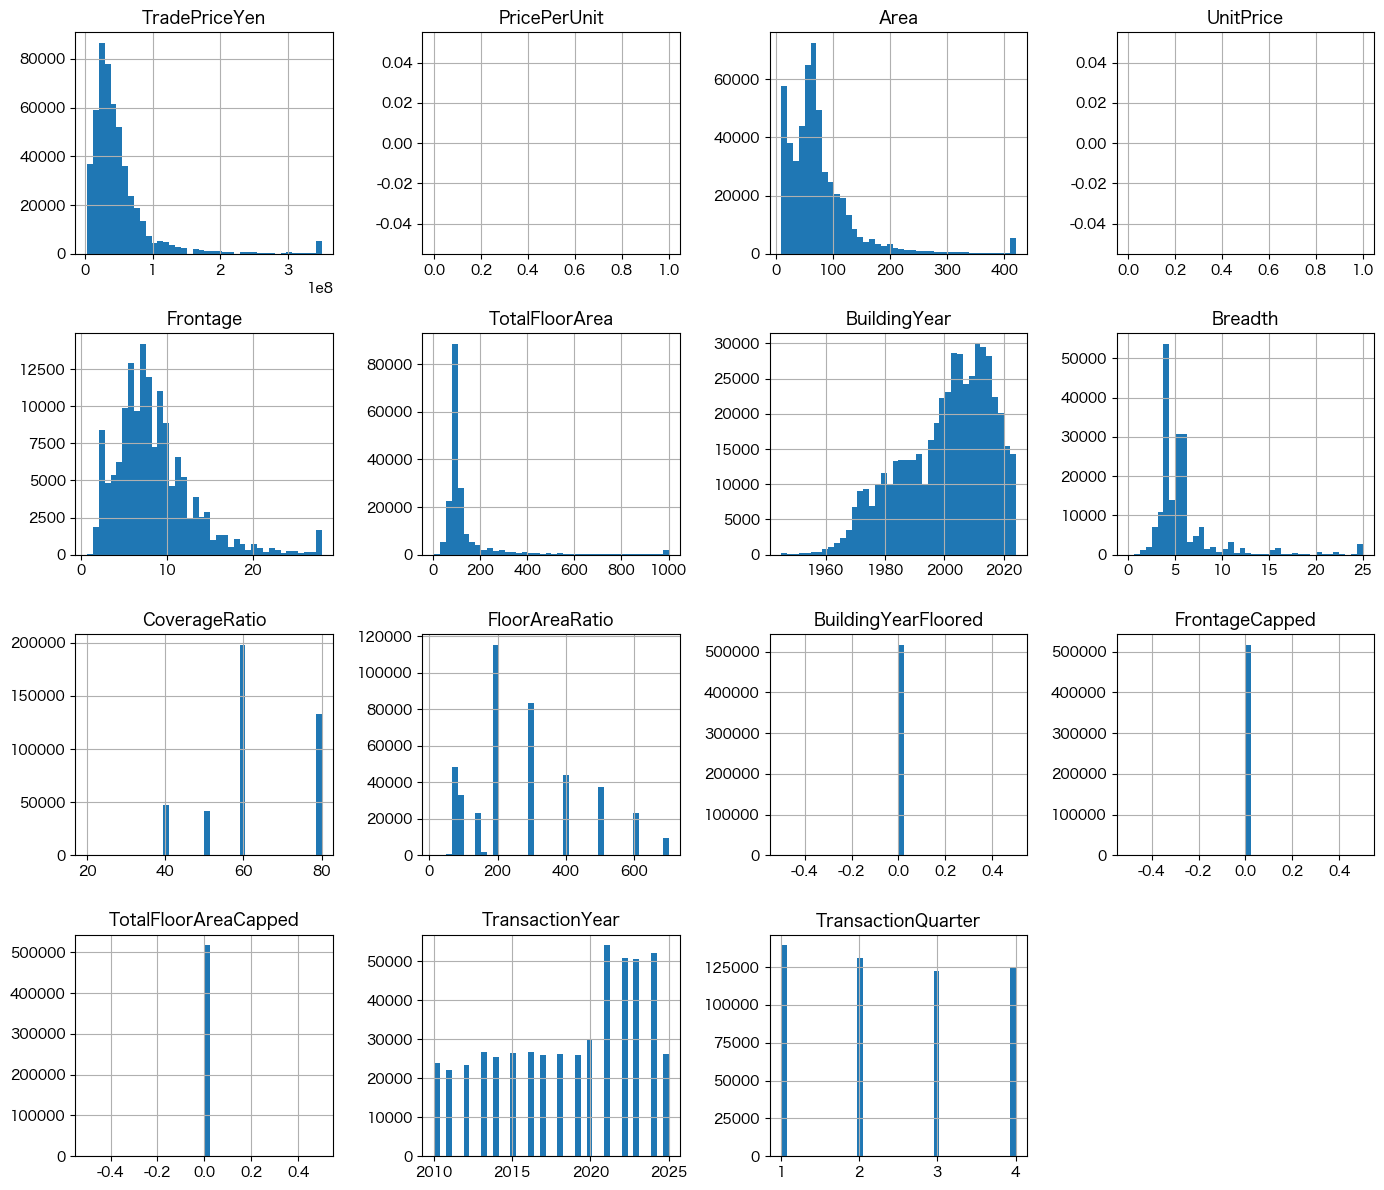

In [13]:
num_cols = data.select_dtypes(include='number').columns

# clip each numeric column at its 99th percentile
clipped = data[num_cols].clip(upper=data[num_cols].quantile(0.99), axis=1)

clipped.hist(figsize=(14, 12), bins=40)
plt.tight_layout()

In [14]:
data.corr(numeric_only=True)

,TradePriceYen,PricePerUnit,Area,UnitPrice,Frontage,TotalFloorArea,BuildingYear,Breadth,CoverageRatio,FloorAreaRatio,BuildingYearFloored,FrontageCapped,TotalFloorAreaCapped,TransactionYear,TransactionQuarter
TradePriceYen,1.000000,NaN,0.292831,NaN,0.095875,0.426482,0.097332,0.261190,0.020222,0.030262,0.002463,0.080014,0.163655,0.102383,-0.006676
PricePerUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,0.292831,NaN,1.000000,NaN,0.472660,0.383135,-0.036509,0.081717,-0.132252,-0.134364,0.011604,0.426393,0.278529,-0.031852,-0.000898
UnitPrice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frontage,0.095875,NaN,0.472660,NaN,1.000000,0.203952,-0.030879,0.035126,0.004042,-0.001621,0.005287,0.999902,0.174014,-0.002868,-0.003003
TotalFloorArea,0.426482,NaN,0.383135,NaN,0.203952,1.000000,-0.106637,0.179432,0.130791,0.170817,0.003677,0.191298,0.934323,-0.034035,-0.002707
BuildingYear,0.097332,NaN,-0.036509,NaN,-0.030879,-0.106637,1.000000,-0.112148,-0.145630,-0.137523,-0.082602,-0.014464,-0.022516,0.116959,-0.005807
Breadth,0.261190,NaN,0.081717,NaN,0.035126,0.179432,-0.112148,1.000000,0.241646,0.332114,-0.000229,0.032707,0.073063,-0.027075,0.000774
CoverageRatio,0.020222,NaN,-0.132252,NaN,0.004042,0.130791,-0.145630,0.241646,1.000000,0.819758,0.007460,-0.007796,0.007812,-0.010492,0.005075
FloorAreaRatio,0.030262,NaN,-0.134364,NaN,-0.001621,0.170817,-0.137523,0.332114,0.819758,1.000000,0.004109,-0.011744,0.007081,-0.028216,0.004037


<Axes: >

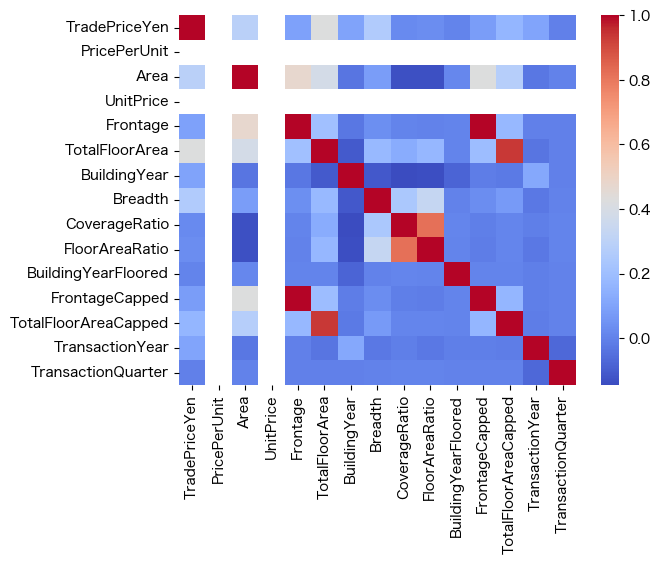

In [15]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')

In [16]:
# Japanese-style 万円 formatter
def yen_man(x, pos):
    return f"{x:,.0f}万円"

# add log trade price
latest_year = data['TransactionYear'].max()

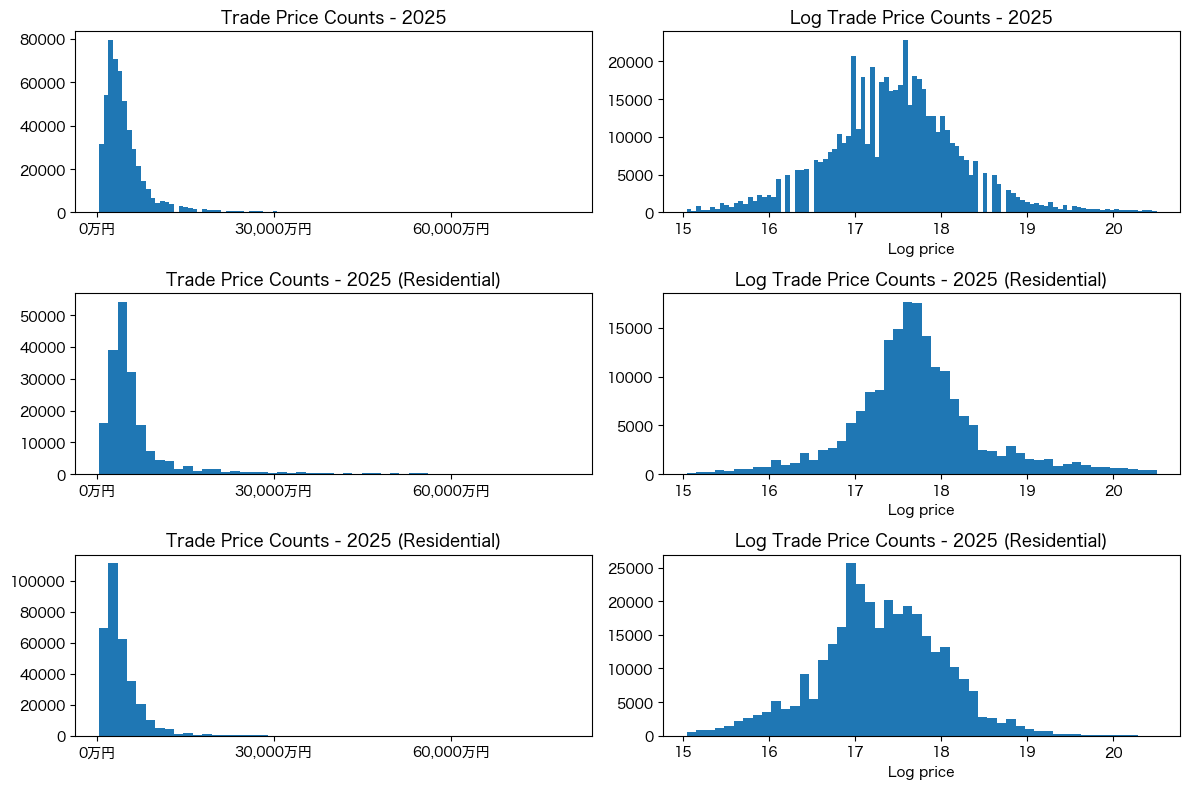

In [17]:
# todo: clip these to remove the outliers that are extending the linear plot

data['LogTradePriceYen'] = np.log(data['TradePriceYen'])

fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Linear - all
axes[0, 0].hist(data['TradePriceYen']/1e4, bins=100)
axes[0, 0].set_title(f"Trade Price Counts - {latest_year}")
axes[0, 0].xaxis.set_major_formatter(FuncFormatter(yen_man))
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - all
axes[0, 1].hist(data['LogTradePriceYen'], bins=100)
axes[0, 1].set_title(f"Log Trade Price Counts - {latest_year}")
axes[0, 1].set_xlabel("Log price")

# Linear - residential
axes[1, 0].hist(data[data['Type'] == 'Residential Land(Land and Building)']['TradePriceYen']/1e4, bins=50)
axes[1, 0].set_title(f"Trade Price Counts - {latest_year} (Residential)")
axes[1, 0].xaxis.set_major_formatter(FuncFormatter(yen_man))
axes[1, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - residential
axes[1, 1].hist(data[data['Type'] == 'Residential Land(Land and Building)']['LogTradePriceYen'], bins=50)
axes[1, 1].set_title(f"Log Trade Price Counts - {latest_year} (Residential)")
axes[1, 1].set_xlabel("Log price")

# Linear - condominiums
axes[2, 0].hist(data[data['Type'] == 'Pre-owned Condominiums, etc.']['TradePriceYen']/1e4, bins=50)
axes[2, 0].set_title(f"Trade Price Counts - {latest_year} (Residential)")
axes[2, 0].xaxis.set_major_formatter(FuncFormatter(yen_man))
axes[2, 0].xaxis.set_major_locator(plt.MaxNLocator(3))

# Log - condominiums
axes[2, 1].hist(data[data['Type'] == 'Pre-owned Condominiums, etc.']['LogTradePriceYen'], bins=50)
axes[2, 1].set_title(f"Log Trade Price Counts - {latest_year} (Residential)")
axes[2, 1].set_xlabel("Log price")

plt.tight_layout()

Avg Transaction Prices (万円) - Most Expensive Municipalities:
Municipality
千代田区 (Chiyoda Ward)    38714
中央区 (Chuo Ward)        32461
港区 (Minato Ward)       29655
渋谷区 (Shibuya Ward)     19600
台東区 (Taito Ward)       17732
Name: TradePriceYen, dtype: int64

Avg Transaction Prices (万円) - Least Expensive Municipalities:
Municipality
青梅市 (Oume City)                         2711
瑞穂町 (Mizuho Town, Nishitama County)     2480
日の出町 (Hinode Town, Nishitama County)    1729
新島村 (Niijima Village)                   1600
八丈町 (Hachijo Town)                       633
Name: TradePriceYen, dtype: int64



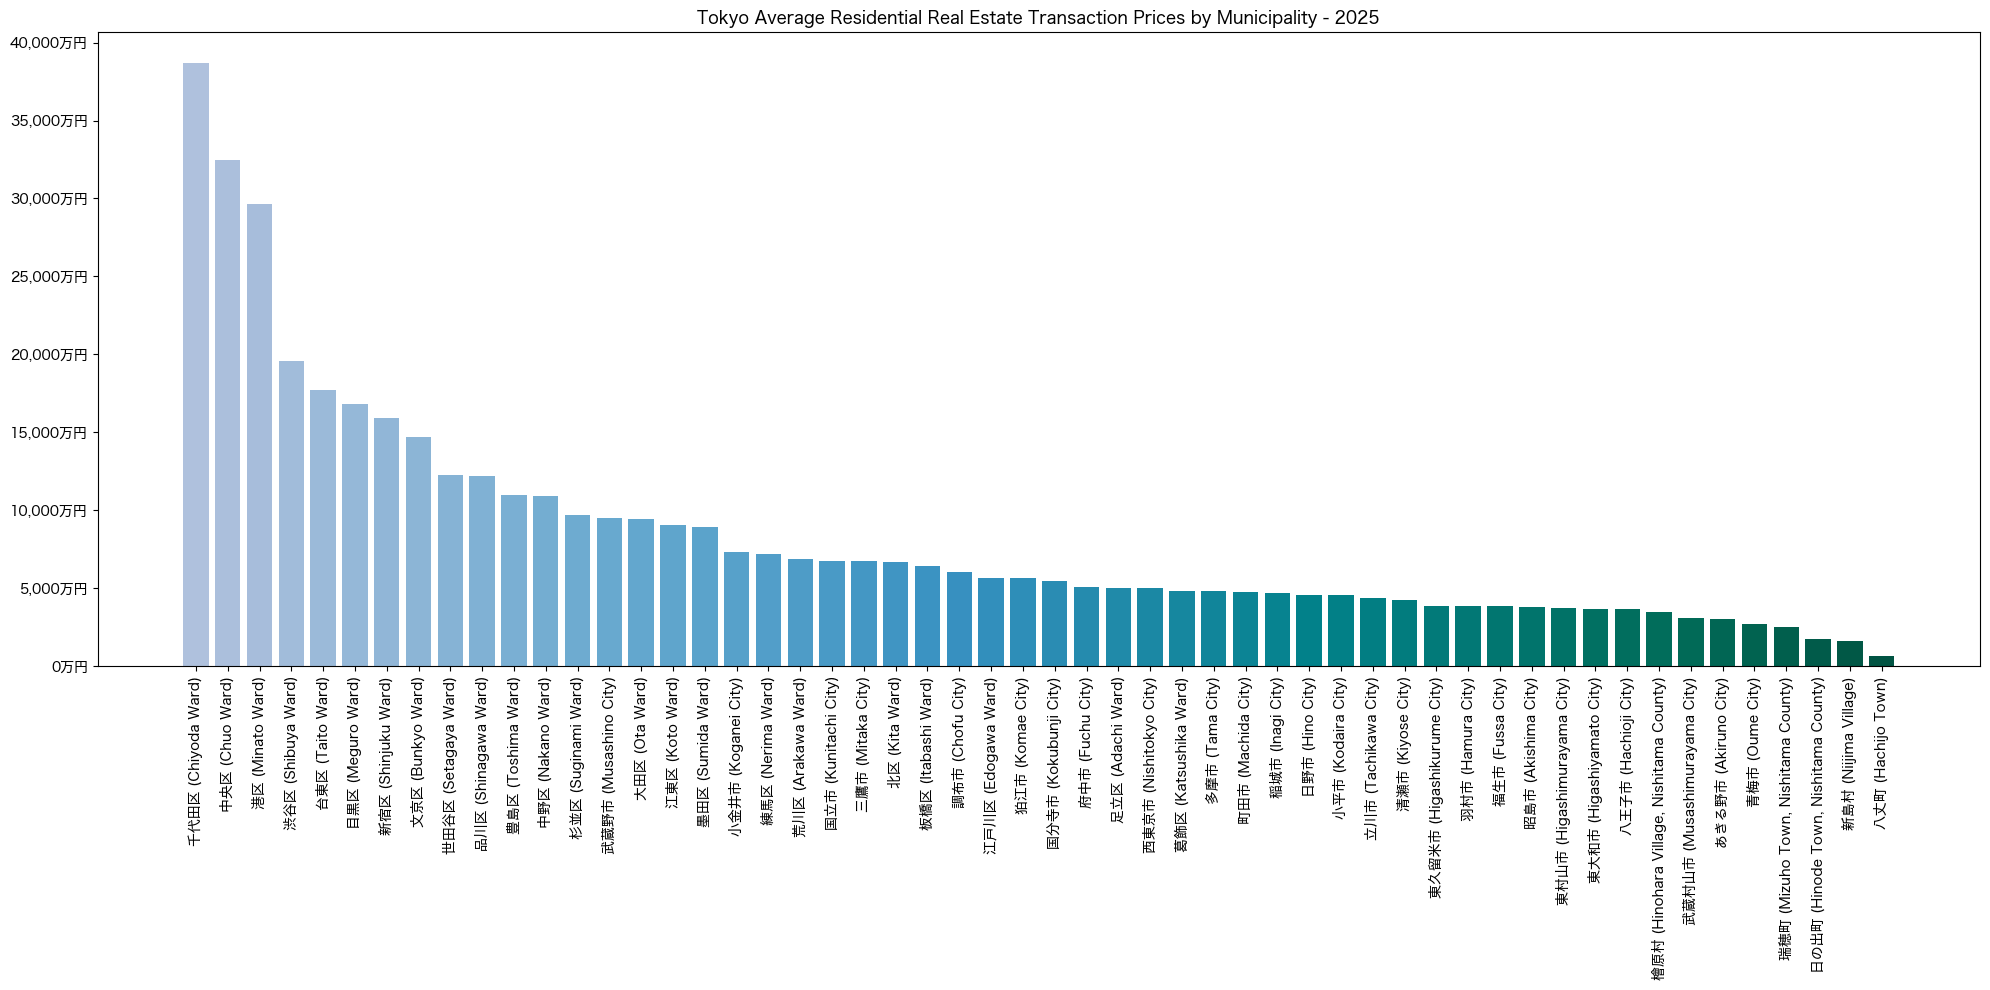

In [18]:
# Sorted average price series in 万円, for residential real estate in the most recent year available
avg_prices_man = (data[(data['Type'] == 'Residential Land(Land and Building)') & (data['TransactionYear'] == latest_year)]
                      .groupby('Municipality')['TradePriceYen']
                      .mean()
                      .sort_values(ascending=False))/1e4

print("Avg Transaction Prices (万円) - Most Expensive Municipalities:")
print(avg_prices_man.head().astype(int))
print()

print("Avg Transaction Prices (万円) - Least Expensive Municipalities:")
print(avg_prices_man.tail().astype(int))
print()


fig, ax = plt.subplots(figsize=(20, 10))
colors = plt.cm.PuBuGn(np.linspace(0.35, 0.95, len(avg_prices_man)))

ax.bar(avg_prices_man.index, avg_prices_man.values, color=colors)
ax.set_title(f"Tokyo Average Residential Real Estate Transaction Prices by Municipality - {latest_year}")
ax.yaxis.set_major_formatter(FuncFormatter(yen_man))

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()